# 数据挖掘互评作业四：离群点分析与异常检测

3220190840 刘聪聪

仓库地址:

https://github.com/liucc1997/DMC/tree/master/assignment4

# Ⅰ. wine数据集

分析过程：

从data/wine/benchmarks/目录下随机抽取两个csv文件，然后使用pyod提供的接口使用KNN, LOF, PCA, LODA算法对抽样的数据训练得到离群点检测模型，计算和输出不同算法下模型的AUC、precision @ rank和ROC曲线。

然后，data/wine/benchmarks/目录下所有的csv文件执行离群点检测，将AUC、precision @ rank，检测模型执行时间，数据集的离群率记录在DataFrame对象中。

最后可视化记录检测评价的DataFrame对象的内容，对比不同算法的表现。

## 初始化

In [159]:
import pandas as pd
import numpy as np
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.loda import LODA
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import roc_curve, auc
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time

In [32]:
example = pd.read_csv("data/wine/benchmarks/wine_benchmark_0001.csv")
example.head()

,point.id,motherset,origin,original.label,diff.score,ground.truth,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,wine_point_3594,wine,regression,7,0.050492,nominal,-1.245962,-0.362411,-0.265853,-0.261304,-0.343495,1.209882,0.747594,-0.899276,0.817846,-0.613338,0.174560
1,wine_point_5089,wine,regression,5,0.082237,anomaly,0.759540,0.973867,0.215849,-0.534540,0.598458,-0.536656,0.199134,0.968217,0.071518,0.596292,-0.915394
2,wine_point_1912,wine,regression,6,0.290201,nominal,-0.088942,-0.969809,-0.403482,-0.870829,-0.429127,-0.592996,-0.791633,-0.699187,-1.110168,1.402712,-0.496181
3,wine_point_4908,wine,regression,5,0.053559,anomaly,0.219597,0.973867,0.284664,0.138039,0.427194,-0.762016,-0.243173,1.034913,0.817846,1.805921,0.006874
4,wine_point_2246,wine,regression,7,0.420300,nominal,0.219597,-0.180191,-0.541112,0.348220,-0.714567,-0.142276,0.446826,-0.242318,-0.363840,-1.016548,0.090717


从数据集中选取特征函数、获取训练集是否为离群点标签的函数

In [117]:
choosed_attrs = ["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide",\
                 "total.sulfur.dioxide","density","pH","sulphates","alcohol"]
def str2bool(x):
    return 1 if x == "anomaly" else 0

def create_features(df):
    tmp = df.iloc[:,6:]
    return standardizer(tmp)
def get_label(df):
    y = df["ground.truth"]
    y = list(map(str2bool,y))
    return y

用于评价模型，输出并显示ROC曲线的函数

In [127]:
def show(title,clf_name, y, y_train_scores):
    evaluate_print(clf_name, y, y_train_scores)
    fpr, tpr, thresholds  =  roc_curve(y, y_train_scores) 
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

## benchmark抽样分析

从data/wine/benchmarks目录下抽样wine_benchmark_1302（离群点比例0.050051335）和wine_benchmark_1673（离群点比例0.1）

查看两个benchmark的元数据

In [5]:
meta = pd.read_csv('data/wine/meta_data/meta_wine.csv')

In [27]:
meta.iloc[[951,1202]]

,bench.id,benchnum,origin,mset,size,n.anom,n.norm,anomaly.rate.level,point.difficulty.level,clustering.algo,irrelevance.level,anomaly.rate,diff.mean,anom.diff.mean,norm.diff.mean,clusteredness.score,irrelevance.score,auc.ci.0.999,ap.ci.0.999
951,wine_benchmark_1302,1302,regression,wine,3896,195,3701,ar-4,pd-1,cluster,ir-0,0.050051,0.144054,0.256001,0.138156,0.001280,0.000000,0.563848,0.069939
1202,wine_benchmark_1673,1673,regression,wine,3930,393,3537,ar-6,pd-2,cluster,ir-2,0.100000,0.166707,0.287356,0.153302,0.023338,0.812496,0.544766,0.121025


使用PyOD工具包中的KNN, LOF, PCA, LODA对上述两个benchmark执行离群点检测，并可视化显示检测模型的评测结果。

KNN ROC:0.6233, precision @ rank n:0.0667


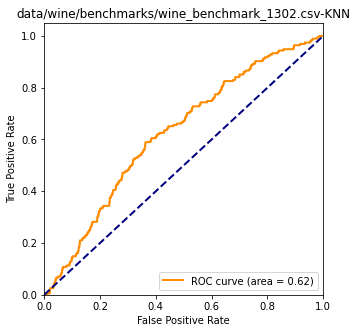

LOF ROC:0.621, precision @ rank n:0.0462


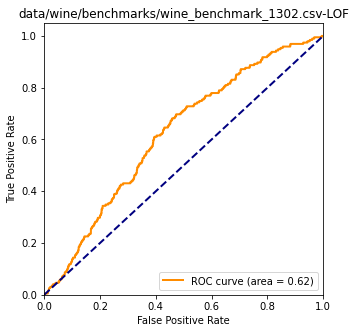

PCA ROC:0.5868, precision @ rank n:0.0722


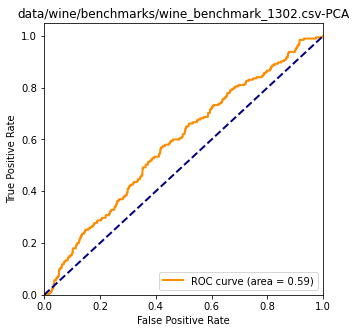

LODA ROC:0.5672, precision @ rank n:0.0462


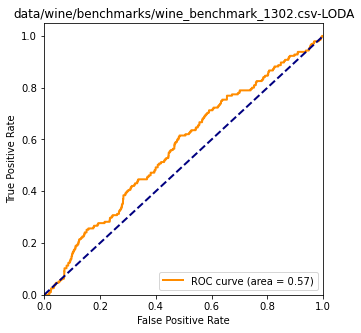

KNN ROC:0.5392, precision @ rank n:0.112


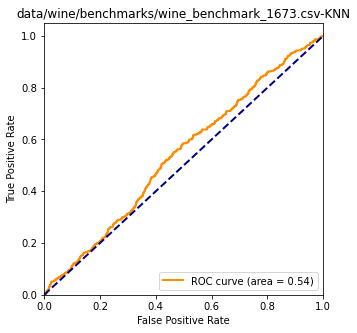

LOF ROC:0.5284, precision @ rank n:0.1196


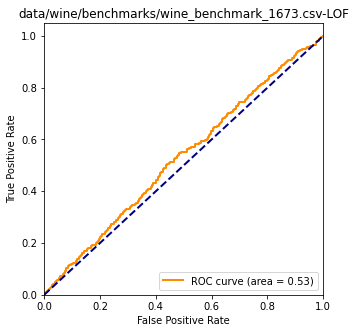

PCA ROC:0.5268, precision @ rank n:0.112


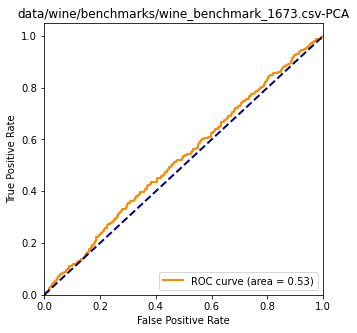

LODA ROC:0.5549, precision @ rank n:0.1145


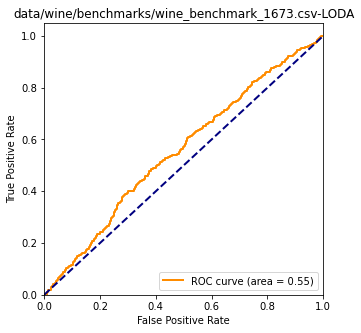

In [175]:
#读入csv文件
paths = ["data/wine/benchmarks/wine_benchmark_1302.csv", "data/wine/benchmarks/wine_benchmark_1673.csv"]
examples = [pd.read_csv(x) for x in paths]
#KNN, LOF, PCA, LODA
models = {
    "KNN": KNN(),
    "LOF": LOF(),
    "PCA": PCA(),
    "LODA": LODA(),
}
i = 0
for e in examples:
    e.dropna(inplace=True)
    x_train = create_features(e)
    y_train = get_label(e)
    c = y_train.count(1)/len(y_train)
    for k in models:
        clf_name = k
        clf = eval(k)(contamination = c)# 初始化检测器
        clf.fit(x_train)
        #得到训练数据的预测标签和离群值
        y_train_pred = clf.labels_  
        y_train_scores = clf.decision_scores_ 
        #输出结果
        show("%s-%s"%(paths[i],clf_name),clf_name,y_train,y_train_scores)
    i = i +1

## 所有benchmark的分析

In [166]:
import os
import time
benchmark_path = "data/wine/benchmarks"
#记录结果的DataFrame
result = pd.DataFrame({
    "benchmark":[],
    "model":[],
    "ROC":[],
    "precision @ rank":[],
    "time": []
})

for b in os.listdir(benchmark_path)[:400]:
    p = os.path.join(benchmark_path,b)
    df = pd.read_csv(p)
    x_train = create_features(df)
    y_train = get_label(df)
    c = y_train.count(1)/len(y_train)
    for k in models:
        t0 = time.time()
        clf_name = k
        clf = eval(k)(contamination = c)# 初始化检测器
        clf.fit(x_train)
        #得到训练数据的预测标签和离群值
        y_train_pred = clf.labels_  
        y_train_scores = clf.decision_scores_ 
        #输出并写入DataFrame
        roc = round(roc_auc_score(y_train, y_train_scores), ndigits=4)
        prn = round(precision_n_scores(y_train, y_train_scores), ndigits=4)
        t1 = time.time()
        duration = round(t1 - t0, ndigits=4)    
        tmp_dict = { "benchmark":b,"model":k,"ROC":roc,"precision @ rank":prn,"time": duration}
        print(tmp_dict)
        new = pd.DataFrame(tmp_dict, index=[1])
        result = result.append(new,ignore_index=True)

{'benchmark': 'wine_benchmark_0001.csv', 'model': 'KNN', 'ROC': 0.55, 'precision @ rank': 0.4018, 'time': 0.303}
{'benchmark': 'wine_benchmark_0001.csv', 'model': 'LOF', 'ROC': 0.551, 'precision @ rank': 0.4014, 'time': 0.333}
{'benchmark': 'wine_benchmark_0001.csv', 'model': 'PCA', 'ROC': 0.5418, 'precision @ rank': 0.4171, 'time': 0.018}
{'benchmark': 'wine_benchmark_0001.csv', 'model': 'LODA', 'ROC': 0.5393, 'precision @ rank': 0.3951, 'time': 0.093}
{'benchmark': 'wine_benchmark_0002.csv', 'model': 'KNN', 'ROC': 0.5485, 'precision @ rank': 0.4005, 'time': 0.287}
{'benchmark': 'wine_benchmark_0002.csv', 'model': 'LOF', 'ROC': 0.5671, 'precision @ rank': 0.4043, 'time': 0.427}
{'benchmark': 'wine_benchmark_0002.csv', 'model': 'PCA', 'ROC': 0.5408, 'precision @ rank': 0.3943, 'time': 0.02}
{'benchmark': 'wine_benchmark_0002.csv', 'model': 'LODA', 'ROC': 0.483, 'precision @ rank': 0.3369, 'time': 0.079}
{'benchmark': 'wine_benchmark_0003.csv', 'model': 'KNN', 'ROC': 0.5568, 'precision 

{'benchmark': 'wine_benchmark_0037.csv', 'model': 'KNN', 'ROC': 0.5343, 'precision @ rank': 0.3947, 'time': 1.3472}
{'benchmark': 'wine_benchmark_0037.csv', 'model': 'LOF', 'ROC': 0.5256, 'precision @ rank': 0.3902, 'time': 1.3566}
{'benchmark': 'wine_benchmark_0037.csv', 'model': 'PCA', 'ROC': 0.5338, 'precision @ rank': 0.3962, 'time': 0.054}
{'benchmark': 'wine_benchmark_0037.csv', 'model': 'LODA', 'ROC': 0.4974, 'precision @ rank': 0.3673, 'time': 0.079}
{'benchmark': 'wine_benchmark_0038.csv', 'model': 'KNN', 'ROC': 0.5185, 'precision @ rank': 0.3799, 'time': 1.2692}
{'benchmark': 'wine_benchmark_0038.csv', 'model': 'LOF', 'ROC': 0.5171, 'precision @ rank': 0.3769, 'time': 1.2325}
{'benchmark': 'wine_benchmark_0038.csv', 'model': 'PCA', 'ROC': 0.5189, 'precision @ rank': 0.3792, 'time': 0.06}
{'benchmark': 'wine_benchmark_0038.csv', 'model': 'LODA', 'ROC': 0.5419, 'precision @ rank': 0.3984, 'time': 0.071}
{'benchmark': 'wine_benchmark_0039.csv', 'model': 'KNN', 'ROC': 0.5398, 'pr

{'benchmark': 'wine_benchmark_0055.csv', 'model': 'KNN', 'ROC': 0.5429, 'precision @ rank': 0.4151, 'time': 0.9226}
{'benchmark': 'wine_benchmark_0055.csv', 'model': 'LOF', 'ROC': 0.5293, 'precision @ rank': 0.4059, 'time': 0.9281}
{'benchmark': 'wine_benchmark_0055.csv', 'model': 'PCA', 'ROC': 0.5244, 'precision @ rank': 0.418, 'time': 0.034}
{'benchmark': 'wine_benchmark_0055.csv', 'model': 'LODA', 'ROC': 0.4735, 'precision @ rank': 0.3593, 'time': 0.066}
{'benchmark': 'wine_benchmark_0056.csv', 'model': 'KNN', 'ROC': 0.5162, 'precision @ rank': 0.3794, 'time': 1.1828}
{'benchmark': 'wine_benchmark_0056.csv', 'model': 'LOF', 'ROC': 0.5086, 'precision @ rank': 0.3816, 'time': 1.3241}
{'benchmark': 'wine_benchmark_0056.csv', 'model': 'PCA', 'ROC': 0.5128, 'precision @ rank': 0.3779, 'time': 0.061}
{'benchmark': 'wine_benchmark_0056.csv', 'model': 'LODA', 'ROC': 0.4895, 'precision @ rank': 0.3593, 'time': 0.079}
{'benchmark': 'wine_benchmark_0057.csv', 'model': 'KNN', 'ROC': 0.5248, 'pr

{'benchmark': 'wine_benchmark_0073.csv', 'model': 'KNN', 'ROC': 0.5533, 'precision @ rank': 0.4146, 'time': 0.8851}
{'benchmark': 'wine_benchmark_0073.csv', 'model': 'LOF', 'ROC': 0.5284, 'precision @ rank': 0.4088, 'time': 0.8231}
{'benchmark': 'wine_benchmark_0073.csv', 'model': 'PCA', 'ROC': 0.5332, 'precision @ rank': 0.4037, 'time': 0.029}
{'benchmark': 'wine_benchmark_0073.csv', 'model': 'LODA', 'ROC': 0.5137, 'precision @ rank': 0.3901, 'time': 0.098}
{'benchmark': 'wine_benchmark_0074.csv', 'model': 'KNN', 'ROC': 0.5384, 'precision @ rank': 0.4077, 'time': 0.8798}
{'benchmark': 'wine_benchmark_0074.csv', 'model': 'LOF', 'ROC': 0.5304, 'precision @ rank': 0.4012, 'time': 0.8471}
{'benchmark': 'wine_benchmark_0074.csv', 'model': 'PCA', 'ROC': 0.5322, 'precision @ rank': 0.4033, 'time': 0.039}
{'benchmark': 'wine_benchmark_0074.csv', 'model': 'LODA', 'ROC': 0.4344, 'precision @ rank': 0.3208, 'time': 0.085}
{'benchmark': 'wine_benchmark_0075.csv', 'model': 'KNN', 'ROC': 0.5622, 'p

{'benchmark': 'wine_benchmark_0091.csv', 'model': 'KNN', 'ROC': 0.5646, 'precision @ rank': 0.4149, 'time': 0.8816}
{'benchmark': 'wine_benchmark_0091.csv', 'model': 'LOF', 'ROC': 0.5387, 'precision @ rank': 0.3979, 'time': 0.8756}
{'benchmark': 'wine_benchmark_0091.csv', 'model': 'PCA', 'ROC': 0.5503, 'precision @ rank': 0.4186, 'time': 0.042}
{'benchmark': 'wine_benchmark_0091.csv', 'model': 'LODA', 'ROC': 0.5786, 'precision @ rank': 0.4445, 'time': 0.079}
{'benchmark': 'wine_benchmark_0092.csv', 'model': 'KNN', 'ROC': 0.5603, 'precision @ rank': 0.4148, 'time': 0.7411}
{'benchmark': 'wine_benchmark_0092.csv', 'model': 'LOF', 'ROC': 0.5425, 'precision @ rank': 0.414, 'time': 0.8601}
{'benchmark': 'wine_benchmark_0092.csv', 'model': 'PCA', 'ROC': 0.5533, 'precision @ rank': 0.4125, 'time': 0.032}
{'benchmark': 'wine_benchmark_0092.csv', 'model': 'LODA', 'ROC': 0.5564, 'precision @ rank': 0.4192, 'time': 0.095}
{'benchmark': 'wine_benchmark_0093.csv', 'model': 'KNN', 'ROC': 0.5533, 'pr

{'benchmark': 'wine_benchmark_0109.csv', 'model': 'KNN', 'ROC': 0.544, 'precision @ rank': 0.4065, 'time': 0.466}
{'benchmark': 'wine_benchmark_0109.csv', 'model': 'LOF', 'ROC': 0.5444, 'precision @ rank': 0.4021, 'time': 0.613}
{'benchmark': 'wine_benchmark_0109.csv', 'model': 'PCA', 'ROC': 0.5279, 'precision @ rank': 0.4021, 'time': 0.014}
{'benchmark': 'wine_benchmark_0109.csv', 'model': 'LODA', 'ROC': 0.5629, 'precision @ rank': 0.4205, 'time': 0.08}
{'benchmark': 'wine_benchmark_0110.csv', 'model': 'KNN', 'ROC': 0.5368, 'precision @ rank': 0.3971, 'time': 0.6971}
{'benchmark': 'wine_benchmark_0110.csv', 'model': 'LOF', 'ROC': 0.538, 'precision @ rank': 0.3978, 'time': 0.543}
{'benchmark': 'wine_benchmark_0110.csv', 'model': 'PCA', 'ROC': 0.5156, 'precision @ rank': 0.3956, 'time': 0.016}
{'benchmark': 'wine_benchmark_0110.csv', 'model': 'LODA', 'ROC': 0.5033, 'precision @ rank': 0.3752, 'time': 0.097}
{'benchmark': 'wine_benchmark_0111.csv', 'model': 'KNN', 'ROC': 0.5462, 'precisi

{'benchmark': 'wine_benchmark_0127.csv', 'model': 'KNN', 'ROC': 0.5503, 'precision @ rank': 0.4033, 'time': 0.491}
{'benchmark': 'wine_benchmark_0127.csv', 'model': 'LOF', 'ROC': 0.5386, 'precision @ rank': 0.4003, 'time': 0.5173}
{'benchmark': 'wine_benchmark_0127.csv', 'model': 'PCA', 'ROC': 0.5373, 'precision @ rank': 0.4137, 'time': 0.015}
{'benchmark': 'wine_benchmark_0127.csv', 'model': 'LODA', 'ROC': 0.5754, 'precision @ rank': 0.4323, 'time': 0.09}
{'benchmark': 'wine_benchmark_0128.csv', 'model': 'KNN', 'ROC': 0.5309, 'precision @ rank': 0.4012, 'time': 0.5481}
{'benchmark': 'wine_benchmark_0128.csv', 'model': 'LOF', 'ROC': 0.5286, 'precision @ rank': 0.3961, 'time': 0.665}
{'benchmark': 'wine_benchmark_0128.csv', 'model': 'PCA', 'ROC': 0.5243, 'precision @ rank': 0.4091, 'time': 0.016}
{'benchmark': 'wine_benchmark_0128.csv', 'model': 'LODA', 'ROC': 0.5583, 'precision @ rank': 0.417, 'time': 0.104}
{'benchmark': 'wine_benchmark_0129.csv', 'model': 'KNN', 'ROC': 0.542, 'precis

{'benchmark': 'wine_benchmark_0145.csv', 'model': 'KNN', 'ROC': 0.5483, 'precision @ rank': 0.4142, 'time': 0.312}
{'benchmark': 'wine_benchmark_0145.csv', 'model': 'LOF', 'ROC': 0.5594, 'precision @ rank': 0.4245, 'time': 0.373}
{'benchmark': 'wine_benchmark_0145.csv', 'model': 'PCA', 'ROC': 0.5427, 'precision @ rank': 0.4245, 'time': 0.021}
{'benchmark': 'wine_benchmark_0145.csv', 'model': 'LODA', 'ROC': 0.499, 'precision @ rank': 0.3886, 'time': 0.081}
{'benchmark': 'wine_benchmark_0146.csv', 'model': 'KNN', 'ROC': 0.5541, 'precision @ rank': 0.4128, 'time': 0.469}
{'benchmark': 'wine_benchmark_0146.csv', 'model': 'LOF', 'ROC': 0.5511, 'precision @ rank': 0.403, 'time': 0.575}
{'benchmark': 'wine_benchmark_0146.csv', 'model': 'PCA', 'ROC': 0.543, 'precision @ rank': 0.4136, 'time': 0.014}
{'benchmark': 'wine_benchmark_0146.csv', 'model': 'LODA', 'ROC': 0.5866, 'precision @ rank': 0.4415, 'time': 0.09}
{'benchmark': 'wine_benchmark_0147.csv', 'model': 'KNN', 'ROC': 0.5355, 'precision

{'benchmark': 'wine_benchmark_0163.csv', 'model': 'KNN', 'ROC': 0.5355, 'precision @ rank': 0.3847, 'time': 0.294}
{'benchmark': 'wine_benchmark_0163.csv', 'model': 'LOF', 'ROC': 0.5531, 'precision @ rank': 0.3945, 'time': 0.421}
{'benchmark': 'wine_benchmark_0163.csv', 'model': 'PCA', 'ROC': 0.5229, 'precision @ rank': 0.3923, 'time': 0.015}
{'benchmark': 'wine_benchmark_0163.csv', 'model': 'LODA', 'ROC': 0.5134, 'precision @ rank': 0.368, 'time': 0.087}
{'benchmark': 'wine_benchmark_0164.csv', 'model': 'KNN', 'ROC': 0.5353, 'precision @ rank': 0.398, 'time': 0.288}
{'benchmark': 'wine_benchmark_0164.csv', 'model': 'LOF', 'ROC': 0.542, 'precision @ rank': 0.4038, 'time': 0.355}
{'benchmark': 'wine_benchmark_0164.csv', 'model': 'PCA', 'ROC': 0.5134, 'precision @ rank': 0.398, 'time': 0.014}
{'benchmark': 'wine_benchmark_0164.csv', 'model': 'LODA', 'ROC': 0.5834, 'precision @ rank': 0.447, 'time': 0.108}
{'benchmark': 'wine_benchmark_0165.csv', 'model': 'KNN', 'ROC': 0.5296, 'precision 

{'benchmark': 'wine_benchmark_0181.csv', 'model': 'KNN', 'ROC': 0.497, 'precision @ rank': 0.4392, 'time': 0.15}
{'benchmark': 'wine_benchmark_0181.csv', 'model': 'LOF', 'ROC': 0.5022, 'precision @ rank': 0.4439, 'time': 0.209}
{'benchmark': 'wine_benchmark_0181.csv', 'model': 'PCA', 'ROC': 0.4815, 'precision @ rank': 0.4364, 'time': 0.01}
{'benchmark': 'wine_benchmark_0181.csv', 'model': 'LODA', 'ROC': 0.5055, 'precision @ rank': 0.4571, 'time': 0.084}
{'benchmark': 'wine_benchmark_0182.csv', 'model': 'KNN', 'ROC': 0.4975, 'precision @ rank': 0.4427, 'time': 0.137}
{'benchmark': 'wine_benchmark_0182.csv', 'model': 'LOF', 'ROC': 0.5, 'precision @ rank': 0.4566, 'time': 0.218}
{'benchmark': 'wine_benchmark_0182.csv', 'model': 'PCA', 'ROC': 0.4834, 'precision @ rank': 0.4492, 'time': 0.011}
{'benchmark': 'wine_benchmark_0182.csv', 'model': 'LODA', 'ROC': 0.4904, 'precision @ rank': 0.4473, 'time': 0.098}
{'benchmark': 'wine_benchmark_0183.csv', 'model': 'KNN', 'ROC': 0.4961, 'precision @

{'benchmark': 'wine_benchmark_0199.csv', 'model': 'KNN', 'ROC': 0.4814, 'precision @ rank': 0.4472, 'time': 0.6686}
{'benchmark': 'wine_benchmark_0199.csv', 'model': 'LOF', 'ROC': 0.4854, 'precision @ rank': 0.4546, 'time': 0.6821}
{'benchmark': 'wine_benchmark_0199.csv', 'model': 'PCA', 'ROC': 0.4825, 'precision @ rank': 0.45, 'time': 0.046}
{'benchmark': 'wine_benchmark_0199.csv', 'model': 'LODA', 'ROC': 0.477, 'precision @ rank': 0.4491, 'time': 0.102}
{'benchmark': 'wine_benchmark_0200.csv', 'model': 'KNN', 'ROC': 0.5138, 'precision @ rank': 0.4727, 'time': 0.612}
{'benchmark': 'wine_benchmark_0200.csv', 'model': 'LOF', 'ROC': 0.512, 'precision @ rank': 0.4655, 'time': 0.573}
{'benchmark': 'wine_benchmark_0200.csv', 'model': 'PCA', 'ROC': 0.5087, 'precision @ rank': 0.4709, 'time': 0.052}
{'benchmark': 'wine_benchmark_0200.csv', 'model': 'LODA', 'ROC': 0.5074, 'precision @ rank': 0.4709, 'time': 0.062}
{'benchmark': 'wine_benchmark_0201.csv', 'model': 'KNN', 'ROC': 0.5049, 'precisi

{'benchmark': 'wine_benchmark_0217.csv', 'model': 'KNN', 'ROC': 0.501, 'precision @ rank': 0.4556, 'time': 0.5807}
{'benchmark': 'wine_benchmark_0217.csv', 'model': 'LOF', 'ROC': 0.4985, 'precision @ rank': 0.4546, 'time': 0.561}
{'benchmark': 'wine_benchmark_0217.csv', 'model': 'PCA', 'ROC': 0.4954, 'precision @ rank': 0.4509, 'time': 0.051}
{'benchmark': 'wine_benchmark_0217.csv', 'model': 'LODA', 'ROC': 0.4872, 'precision @ rank': 0.4491, 'time': 0.066}
{'benchmark': 'wine_benchmark_0218.csv', 'model': 'KNN', 'ROC': 0.4814, 'precision @ rank': 0.415, 'time': 0.585}
{'benchmark': 'wine_benchmark_0218.csv', 'model': 'LOF', 'ROC': 0.4799, 'precision @ rank': 0.4131, 'time': 0.6811}
{'benchmark': 'wine_benchmark_0218.csv', 'model': 'PCA', 'ROC': 0.4764, 'precision @ rank': 0.4179, 'time': 0.055}
{'benchmark': 'wine_benchmark_0218.csv', 'model': 'LODA', 'ROC': 0.4881, 'precision @ rank': 0.4361, 'time': 0.065}
{'benchmark': 'wine_benchmark_0219.csv', 'model': 'KNN', 'ROC': 0.5167, 'preci

{'benchmark': 'wine_benchmark_0235.csv', 'model': 'KNN', 'ROC': 0.4961, 'precision @ rank': 0.447, 'time': 0.5099}
{'benchmark': 'wine_benchmark_0235.csv', 'model': 'LOF', 'ROC': 0.4975, 'precision @ rank': 0.447, 'time': 0.436}
{'benchmark': 'wine_benchmark_0235.csv', 'model': 'PCA', 'ROC': 0.4888, 'precision @ rank': 0.4358, 'time': 0.025}
{'benchmark': 'wine_benchmark_0235.csv', 'model': 'LODA', 'ROC': 0.5114, 'precision @ rank': 0.4649, 'time': 0.078}
{'benchmark': 'wine_benchmark_0236.csv', 'model': 'KNN', 'ROC': 0.488, 'precision @ rank': 0.4405, 'time': 0.6432}
{'benchmark': 'wine_benchmark_0236.csv', 'model': 'LOF', 'ROC': 0.4847, 'precision @ rank': 0.4321, 'time': 0.8881}
{'benchmark': 'wine_benchmark_0236.csv', 'model': 'PCA', 'ROC': 0.4836, 'precision @ rank': 0.4433, 'time': 0.043}
{'benchmark': 'wine_benchmark_0236.csv', 'model': 'LODA', 'ROC': 0.5055, 'precision @ rank': 0.4658, 'time': 0.066}
{'benchmark': 'wine_benchmark_0237.csv', 'model': 'KNN', 'ROC': 0.4963, 'preci

ValueError: contamination must be in (0, 0.5], got: 0.510204

In [167]:
for b in os.listdir(benchmark_path)[400:800]:
    p = os.path.join(benchmark_path,b)
    df = pd.read_csv(p)
    x_train = create_features(df)
    y_train = get_label(df)
    c = y_train.count(1)/len(y_train)
    for k in models:
        t0 = time.time()
        clf_name = k
        clf = eval(k)(contamination = c)# 初始化检测器
        clf.fit(x_train)
        #得到训练数据的预测标签和离群值
        y_train_pred = clf.labels_  
        y_train_scores = clf.decision_scores_ 
        #输出并写入DataFrame
        roc = round(roc_auc_score(y_train, y_train_scores), ndigits=4)
        prn = round(precision_n_scores(y_train, y_train_scores), ndigits=4)
        t1 = time.time()
        duration = round(t1 - t0, ndigits=4)    
        tmp_dict = { "benchmark":b,"model":k,"ROC":roc,"precision @ rank":prn,"time": duration}
        print(tmp_dict)
        new = pd.DataFrame(tmp_dict, index=[1])
        result = result.append(new,ignore_index=True)

{'benchmark': 'wine_benchmark_0401.csv', 'model': 'KNN', 'ROC': 0.7938, 'precision @ rank': 0.0, 'time': 0.216}
{'benchmark': 'wine_benchmark_0401.csv', 'model': 'LOF', 'ROC': 0.8189, 'precision @ rank': 0.0, 'time': 0.3201}
{'benchmark': 'wine_benchmark_0401.csv', 'model': 'PCA', 'ROC': 0.6698, 'precision @ rank': 0.0, 'time': 0.012}
{'benchmark': 'wine_benchmark_0401.csv', 'model': 'LODA', 'ROC': 0.7502, 'precision @ rank': 0.0, 'time': 0.081}
{'benchmark': 'wine_benchmark_0402.csv', 'model': 'KNN', 'ROC': 0.5562, 'precision @ rank': 0.0, 'time': 0.269}
{'benchmark': 'wine_benchmark_0402.csv', 'model': 'LOF', 'ROC': 0.5449, 'precision @ rank': 0.0, 'time': 0.492}
{'benchmark': 'wine_benchmark_0402.csv', 'model': 'PCA', 'ROC': 0.274, 'precision @ rank': 0.0, 'time': 0.013}
{'benchmark': 'wine_benchmark_0402.csv', 'model': 'LODA', 'ROC': 0.3606, 'precision @ rank': 0.0, 'time': 0.0767}
{'benchmark': 'wine_benchmark_0403.csv', 'model': 'KNN', 'ROC': 0.7817, 'precision @ rank': 0.0, 'tim

{'benchmark': 'wine_benchmark_0419.csv', 'model': 'LOF', 'ROC': 0.4899, 'precision @ rank': 0.0, 'time': 1.1821}
{'benchmark': 'wine_benchmark_0419.csv', 'model': 'PCA', 'ROC': 0.4512, 'precision @ rank': 0.0, 'time': 0.067}
{'benchmark': 'wine_benchmark_0419.csv', 'model': 'LODA', 'ROC': 0.575, 'precision @ rank': 0.0, 'time': 0.085}
{'benchmark': 'wine_benchmark_0420.csv', 'model': 'KNN', 'ROC': 0.4739, 'precision @ rank': 0.0, 'time': 1.3196}
{'benchmark': 'wine_benchmark_0420.csv', 'model': 'LOF', 'ROC': 0.4484, 'precision @ rank': 0.0, 'time': 1.2373}
{'benchmark': 'wine_benchmark_0420.csv', 'model': 'PCA', 'ROC': 0.4136, 'precision @ rank': 0.0, 'time': 0.056}
{'benchmark': 'wine_benchmark_0420.csv', 'model': 'LODA', 'ROC': 0.4097, 'precision @ rank': 0.0, 'time': 0.085}
{'benchmark': 'wine_benchmark_0421.csv', 'model': 'KNN', 'ROC': 0.876, 'precision @ rank': 0.0, 'time': 0.239}
{'benchmark': 'wine_benchmark_0421.csv', 'model': 'LOF', 'ROC': 0.8604, 'precision @ rank': 0.0, 'tim

{'benchmark': 'wine_benchmark_0438.csv', 'model': 'KNN', 'ROC': 0.6192, 'precision @ rank': 0.0, 'time': 0.9651}
{'benchmark': 'wine_benchmark_0438.csv', 'model': 'LOF', 'ROC': 0.6084, 'precision @ rank': 0.0, 'time': 1.0611}
{'benchmark': 'wine_benchmark_0438.csv', 'model': 'PCA', 'ROC': 0.5201, 'precision @ rank': 0.0, 'time': 0.048}
{'benchmark': 'wine_benchmark_0438.csv', 'model': 'LODA', 'ROC': 0.4389, 'precision @ rank': 0.0, 'time': 0.077}
{'benchmark': 'wine_benchmark_0439.csv', 'model': 'KNN', 'ROC': 0.4601, 'precision @ rank': 0.0, 'time': 0.9606}
{'benchmark': 'wine_benchmark_0439.csv', 'model': 'LOF', 'ROC': 0.453, 'precision @ rank': 0.0, 'time': 0.9251}
{'benchmark': 'wine_benchmark_0439.csv', 'model': 'PCA', 'ROC': 0.435, 'precision @ rank': 0.0, 'time': 0.0528}
{'benchmark': 'wine_benchmark_0439.csv', 'model': 'LODA', 'ROC': 0.6339, 'precision @ rank': 0.0, 'time': 0.073}
{'benchmark': 'wine_benchmark_0440.csv', 'model': 'KNN', 'ROC': 0.4681, 'precision @ rank': 0.0, 't

{'benchmark': 'wine_benchmark_0456.csv', 'model': 'LOF', 'ROC': 0.4183, 'precision @ rank': 0.0, 'time': 1.0151}
{'benchmark': 'wine_benchmark_0456.csv', 'model': 'PCA', 'ROC': 0.4993, 'precision @ rank': 0.0, 'time': 0.041}
{'benchmark': 'wine_benchmark_0456.csv', 'model': 'LODA', 'ROC': 0.4897, 'precision @ rank': 0.0, 'time': 0.07}
{'benchmark': 'wine_benchmark_0457.csv', 'model': 'KNN', 'ROC': 0.5253, 'precision @ rank': 0.0, 'time': 1.0161}
{'benchmark': 'wine_benchmark_0457.csv', 'model': 'LOF', 'ROC': 0.5292, 'precision @ rank': 0.0, 'time': 1.3191}
{'benchmark': 'wine_benchmark_0457.csv', 'model': 'PCA', 'ROC': 0.5665, 'precision @ rank': 0.0, 'time': 0.051}
{'benchmark': 'wine_benchmark_0457.csv', 'model': 'LODA', 'ROC': 0.5895, 'precision @ rank': 0.0, 'time': 0.083}
{'benchmark': 'wine_benchmark_0458.csv', 'model': 'KNN', 'ROC': 0.5728, 'precision @ rank': 0.25, 'time': 1.0331}
{'benchmark': 'wine_benchmark_0458.csv', 'model': 'LOF', 'ROC': 0.595, 'precision @ rank': 0.25, '

{'benchmark': 'wine_benchmark_0475.csv', 'model': 'KNN', 'ROC': 0.5568, 'precision @ rank': 0.0, 'time': 0.514}
{'benchmark': 'wine_benchmark_0475.csv', 'model': 'LOF', 'ROC': 0.5446, 'precision @ rank': 0.0, 'time': 0.6591}
{'benchmark': 'wine_benchmark_0475.csv', 'model': 'PCA', 'ROC': 0.6805, 'precision @ rank': 0.0, 'time': 0.031}
{'benchmark': 'wine_benchmark_0475.csv', 'model': 'LODA', 'ROC': 0.565, 'precision @ rank': 0.0, 'time': 0.068}
{'benchmark': 'wine_benchmark_0476.csv', 'model': 'KNN', 'ROC': 0.4635, 'precision @ rank': 0.0, 'time': 0.8721}
{'benchmark': 'wine_benchmark_0476.csv', 'model': 'LOF', 'ROC': 0.3363, 'precision @ rank': 0.0, 'time': 1.0346}
{'benchmark': 'wine_benchmark_0476.csv', 'model': 'PCA', 'ROC': 0.6828, 'precision @ rank': 0.0, 'time': 0.061}
{'benchmark': 'wine_benchmark_0476.csv', 'model': 'LODA', 'ROC': 0.4108, 'precision @ rank': 0.0, 'time': 0.0731}
{'benchmark': 'wine_benchmark_0477.csv', 'model': 'KNN', 'ROC': 0.6957, 'precision @ rank': 0.0, 't

{'benchmark': 'wine_benchmark_0613.csv', 'model': 'LOF', 'ROC': 0.4194, 'precision @ rank': 0.0, 'time': 1.0557}
{'benchmark': 'wine_benchmark_0613.csv', 'model': 'PCA', 'ROC': 0.4471, 'precision @ rank': 0.0, 'time': 0.027}
{'benchmark': 'wine_benchmark_0613.csv', 'model': 'LODA', 'ROC': 0.4881, 'precision @ rank': 0.0, 'time': 0.076}
{'benchmark': 'wine_benchmark_0614.csv', 'model': 'KNN', 'ROC': 0.6571, 'precision @ rank': 0.0526, 'time': 0.8661}
{'benchmark': 'wine_benchmark_0614.csv', 'model': 'LOF', 'ROC': 0.623, 'precision @ rank': 0.0526, 'time': 1.1571}
{'benchmark': 'wine_benchmark_0614.csv', 'model': 'PCA', 'ROC': 0.6944, 'precision @ rank': 0.0, 'time': 0.029}
{'benchmark': 'wine_benchmark_0614.csv', 'model': 'LODA', 'ROC': 0.6769, 'precision @ rank': 0.0, 'time': 0.082}
{'benchmark': 'wine_benchmark_0615.csv', 'model': 'KNN', 'ROC': 0.4415, 'precision @ rank': 0.0, 'time': 0.9921}
{'benchmark': 'wine_benchmark_0615.csv', 'model': 'LOF', 'ROC': 0.4523, 'precision @ rank': 0

{'benchmark': 'wine_benchmark_0632.csv', 'model': 'KNN', 'ROC': 0.653, 'precision @ rank': 0.1053, 'time': 0.7501}
{'benchmark': 'wine_benchmark_0632.csv', 'model': 'LOF', 'ROC': 0.6051, 'precision @ rank': 0.0526, 'time': 0.8751}
{'benchmark': 'wine_benchmark_0632.csv', 'model': 'PCA', 'ROC': 0.6605, 'precision @ rank': 0.0526, 'time': 0.024}
{'benchmark': 'wine_benchmark_0632.csv', 'model': 'LODA', 'ROC': 0.5676, 'precision @ rank': 0.0526, 'time': 0.071}
{'benchmark': 'wine_benchmark_0633.csv', 'model': 'KNN', 'ROC': 0.72, 'precision @ rank': 0.1053, 'time': 0.7971}
{'benchmark': 'wine_benchmark_0633.csv', 'model': 'LOF', 'ROC': 0.5839, 'precision @ rank': 0.1053, 'time': 0.9231}
{'benchmark': 'wine_benchmark_0633.csv', 'model': 'PCA', 'ROC': 0.6811, 'precision @ rank': 0.0526, 'time': 0.029}
{'benchmark': 'wine_benchmark_0633.csv', 'model': 'LODA', 'ROC': 0.5571, 'precision @ rank': 0.0526, 'time': 0.079}
{'benchmark': 'wine_benchmark_0634.csv', 'model': 'KNN', 'ROC': 0.7213, 'prec

{'benchmark': 'wine_benchmark_0650.csv', 'model': 'KNN', 'ROC': 0.6028, 'precision @ rank': 0.0, 'time': 0.396}
{'benchmark': 'wine_benchmark_0650.csv', 'model': 'LOF', 'ROC': 0.5824, 'precision @ rank': 0.0, 'time': 0.477}
{'benchmark': 'wine_benchmark_0650.csv', 'model': 'PCA', 'ROC': 0.5698, 'precision @ rank': 0.0, 'time': 0.016}
{'benchmark': 'wine_benchmark_0650.csv', 'model': 'LODA', 'ROC': 0.5511, 'precision @ rank': 0.0, 'time': 0.09}
{'benchmark': 'wine_benchmark_0651.csv', 'model': 'KNN', 'ROC': 0.5262, 'precision @ rank': 0.0, 'time': 0.7121}
{'benchmark': 'wine_benchmark_0651.csv', 'model': 'LOF', 'ROC': 0.4952, 'precision @ rank': 0.0, 'time': 0.9601}
{'benchmark': 'wine_benchmark_0651.csv', 'model': 'PCA', 'ROC': 0.5388, 'precision @ rank': 0.0, 'time': 0.032}
{'benchmark': 'wine_benchmark_0651.csv', 'model': 'LODA', 'ROC': 0.4677, 'precision @ rank': 0.0, 'time': 0.1}
{'benchmark': 'wine_benchmark_0652.csv', 'model': 'KNN', 'ROC': 0.5942, 'precision @ rank': 0.0, 'time'

{'benchmark': 'wine_benchmark_0668.csv', 'model': 'LOF', 'ROC': 0.7043, 'precision @ rank': 0.0, 'time': 0.521}
{'benchmark': 'wine_benchmark_0668.csv', 'model': 'PCA', 'ROC': 0.7579, 'precision @ rank': 0.0, 'time': 0.017}
{'benchmark': 'wine_benchmark_0668.csv', 'model': 'LODA', 'ROC': 0.6966, 'precision @ rank': 0.0, 'time': 0.1}
{'benchmark': 'wine_benchmark_0669.csv', 'model': 'KNN', 'ROC': 0.6532, 'precision @ rank': 0.0, 'time': 0.572}
{'benchmark': 'wine_benchmark_0669.csv', 'model': 'LOF', 'ROC': 0.6205, 'precision @ rank': 0.0, 'time': 0.595}
{'benchmark': 'wine_benchmark_0669.csv', 'model': 'PCA', 'ROC': 0.6083, 'precision @ rank': 0.0, 'time': 0.016}
{'benchmark': 'wine_benchmark_0669.csv', 'model': 'LODA', 'ROC': 0.6185, 'precision @ rank': 0.0, 'time': 0.093}
{'benchmark': 'wine_benchmark_0670.csv', 'model': 'KNN', 'ROC': 0.6116, 'precision @ rank': 0.0, 'time': 0.522}
{'benchmark': 'wine_benchmark_0670.csv', 'model': 'LOF', 'ROC': 0.6102, 'precision @ rank': 0.0, 'time':

{'benchmark': 'wine_benchmark_0687.csv', 'model': 'KNN', 'ROC': 0.6806, 'precision @ rank': 0.0, 'time': 0.455}
{'benchmark': 'wine_benchmark_0687.csv', 'model': 'LOF', 'ROC': 0.6651, 'precision @ rank': 0.0, 'time': 0.632}
{'benchmark': 'wine_benchmark_0687.csv', 'model': 'PCA', 'ROC': 0.6623, 'precision @ rank': 0.0, 'time': 0.015}
{'benchmark': 'wine_benchmark_0687.csv', 'model': 'LODA', 'ROC': 0.6571, 'precision @ rank': 0.0, 'time': 0.091}
{'benchmark': 'wine_benchmark_0688.csv', 'model': 'KNN', 'ROC': 0.6809, 'precision @ rank': 0.0, 'time': 0.509}
{'benchmark': 'wine_benchmark_0688.csv', 'model': 'LOF', 'ROC': 0.6525, 'precision @ rank': 0.0, 'time': 0.6016}
{'benchmark': 'wine_benchmark_0688.csv', 'model': 'PCA', 'ROC': 0.6413, 'precision @ rank': 0.0, 'time': 0.023}
{'benchmark': 'wine_benchmark_0688.csv', 'model': 'LODA', 'ROC': 0.6289, 'precision @ rank': 0.0, 'time': 0.085}
{'benchmark': 'wine_benchmark_0689.csv', 'model': 'KNN', 'ROC': 0.6717, 'precision @ rank': 0.0, 'tim

{'benchmark': 'wine_benchmark_0705.csv', 'model': 'LOF', 'ROC': 0.644, 'precision @ rank': 0.0, 'time': 0.341}
{'benchmark': 'wine_benchmark_0705.csv', 'model': 'PCA', 'ROC': 0.6423, 'precision @ rank': 0.0, 'time': 0.011}
{'benchmark': 'wine_benchmark_0705.csv', 'model': 'LODA', 'ROC': 0.5566, 'precision @ rank': 0.0, 'time': 0.107}
{'benchmark': 'wine_benchmark_0706.csv', 'model': 'KNN', 'ROC': 0.6388, 'precision @ rank': 0.0, 'time': 0.552}
{'benchmark': 'wine_benchmark_0706.csv', 'model': 'LOF', 'ROC': 0.6174, 'precision @ rank': 0.0526, 'time': 0.56}
{'benchmark': 'wine_benchmark_0706.csv', 'model': 'PCA', 'ROC': 0.6418, 'precision @ rank': 0.0, 'time': 0.022}
{'benchmark': 'wine_benchmark_0706.csv', 'model': 'LODA', 'ROC': 0.539, 'precision @ rank': 0.0, 'time': 0.117}
{'benchmark': 'wine_benchmark_0707.csv', 'model': 'KNN', 'ROC': 0.533, 'precision @ rank': 0.0, 'time': 0.5121}
{'benchmark': 'wine_benchmark_0707.csv', 'model': 'LOF', 'ROC': 0.53, 'precision @ rank': 0.0, 'time':

{'benchmark': 'wine_benchmark_0724.csv', 'model': 'KNN', 'ROC': 0.511, 'precision @ rank': 0.0625, 'time': 0.212}
{'benchmark': 'wine_benchmark_0724.csv', 'model': 'LOF', 'ROC': 0.5766, 'precision @ rank': 0.0625, 'time': 0.243}
{'benchmark': 'wine_benchmark_0724.csv', 'model': 'PCA', 'ROC': 0.5063, 'precision @ rank': 0.0625, 'time': 0.013}
{'benchmark': 'wine_benchmark_0724.csv', 'model': 'LODA', 'ROC': 0.4358, 'precision @ rank': 0.0, 'time': 0.092}
{'benchmark': 'wine_benchmark_0725.csv', 'model': 'KNN', 'ROC': 0.6034, 'precision @ rank': 0.0, 'time': 0.234}
{'benchmark': 'wine_benchmark_0725.csv', 'model': 'LOF', 'ROC': 0.6801, 'precision @ rank': 0.0, 'time': 0.293}
{'benchmark': 'wine_benchmark_0725.csv', 'model': 'PCA', 'ROC': 0.5861, 'precision @ rank': 0.0625, 'time': 0.013}
{'benchmark': 'wine_benchmark_0725.csv', 'model': 'LODA', 'ROC': 0.5928, 'precision @ rank': 0.0625, 'time': 0.09}
{'benchmark': 'wine_benchmark_0726.csv', 'model': 'KNN', 'ROC': 0.6159, 'precision @ rank

{'benchmark': 'wine_benchmark_0742.csv', 'model': 'LOF', 'ROC': 0.66, 'precision @ rank': 0.0667, 'time': 0.298}
{'benchmark': 'wine_benchmark_0742.csv', 'model': 'PCA', 'ROC': 0.6188, 'precision @ rank': 0.0, 'time': 0.014}
{'benchmark': 'wine_benchmark_0742.csv', 'model': 'LODA', 'ROC': 0.6925, 'precision @ rank': 0.0, 'time': 0.098}
{'benchmark': 'wine_benchmark_0743.csv', 'model': 'KNN', 'ROC': 0.5789, 'precision @ rank': 0.0, 'time': 0.254}
{'benchmark': 'wine_benchmark_0743.csv', 'model': 'LOF', 'ROC': 0.5405, 'precision @ rank': 0.0, 'time': 0.288}
{'benchmark': 'wine_benchmark_0743.csv', 'model': 'PCA', 'ROC': 0.5959, 'precision @ rank': 0.0, 'time': 0.019}
{'benchmark': 'wine_benchmark_0743.csv', 'model': 'LODA', 'ROC': 0.582, 'precision @ rank': 0.0, 'time': 0.075}
{'benchmark': 'wine_benchmark_0744.csv', 'model': 'KNN', 'ROC': 0.7144, 'precision @ rank': 0.0, 'time': 0.202}
{'benchmark': 'wine_benchmark_0744.csv', 'model': 'LOF', 'ROC': 0.6576, 'precision @ rank': 0.0625, 't

{'benchmark': 'wine_benchmark_0761.csv', 'model': 'KNN', 'ROC': 0.6054, 'precision @ rank': 0.0, 'time': 0.1735}
{'benchmark': 'wine_benchmark_0761.csv', 'model': 'LOF', 'ROC': 0.536, 'precision @ rank': 0.0, 'time': 0.271}
{'benchmark': 'wine_benchmark_0761.csv', 'model': 'PCA', 'ROC': 0.4886, 'precision @ rank': 0.0, 'time': 0.013}
{'benchmark': 'wine_benchmark_0761.csv', 'model': 'LODA', 'ROC': 0.4357, 'precision @ rank': 0.0, 'time': 0.101}
{'benchmark': 'wine_benchmark_0762.csv', 'model': 'KNN', 'ROC': 0.5837, 'precision @ rank': 0.0, 'time': 0.203}
{'benchmark': 'wine_benchmark_0762.csv', 'model': 'LOF', 'ROC': 0.5807, 'precision @ rank': 0.0, 'time': 0.31}
{'benchmark': 'wine_benchmark_0762.csv', 'model': 'PCA', 'ROC': 0.4836, 'precision @ rank': 0.0, 'time': 0.011}
{'benchmark': 'wine_benchmark_0762.csv', 'model': 'LODA', 'ROC': 0.5067, 'precision @ rank': 0.0, 'time': 0.094}
{'benchmark': 'wine_benchmark_0763.csv', 'model': 'KNN', 'ROC': 0.5672, 'precision @ rank': 0.0, 'time'

{'benchmark': 'wine_benchmark_0779.csv', 'model': 'LOF', 'ROC': 0.3675, 'precision @ rank': 0.0, 'time': 1.1027}
{'benchmark': 'wine_benchmark_0779.csv', 'model': 'PCA', 'ROC': 0.3916, 'precision @ rank': 0.0, 'time': 0.05}
{'benchmark': 'wine_benchmark_0779.csv', 'model': 'LODA', 'ROC': 0.4754, 'precision @ rank': 0.0, 'time': 0.086}
{'benchmark': 'wine_benchmark_0780.csv', 'model': 'KNN', 'ROC': 0.5206, 'precision @ rank': 0.0, 'time': 1.0001}
{'benchmark': 'wine_benchmark_0780.csv', 'model': 'LOF', 'ROC': 0.5117, 'precision @ rank': 0.0, 'time': 0.9271}
{'benchmark': 'wine_benchmark_0780.csv', 'model': 'PCA', 'ROC': 0.5148, 'precision @ rank': 0.0, 'time': 0.046}
{'benchmark': 'wine_benchmark_0780.csv', 'model': 'LODA', 'ROC': 0.5332, 'precision @ rank': 0.0, 'time': 0.067}
{'benchmark': 'wine_benchmark_0821.csv', 'model': 'KNN', 'ROC': 0.4905, 'precision @ rank': 0.0, 'time': 0.024}
{'benchmark': 'wine_benchmark_0821.csv', 'model': 'LOF', 'ROC': 0.4164, 'precision @ rank': 0.0, 'ti

{'benchmark': 'wine_benchmark_0908.csv', 'model': 'KNN', 'ROC': 0.603, 'precision @ rank': 0.0263, 'time': 0.43}
{'benchmark': 'wine_benchmark_0908.csv', 'model': 'LOF', 'ROC': 0.5728, 'precision @ rank': 0.0, 'time': 0.5441}
{'benchmark': 'wine_benchmark_0908.csv', 'model': 'PCA', 'ROC': 0.5879, 'precision @ rank': 0.0263, 'time': 0.026}
{'benchmark': 'wine_benchmark_0908.csv', 'model': 'LODA', 'ROC': 0.5464, 'precision @ rank': 0.0263, 'time': 0.086}
{'benchmark': 'wine_benchmark_0909.csv', 'model': 'KNN', 'ROC': 0.6209, 'precision @ rank': 0.027, 'time': 0.57}
{'benchmark': 'wine_benchmark_0909.csv', 'model': 'LOF', 'ROC': 0.5859, 'precision @ rank': 0.0, 'time': 0.7086}
{'benchmark': 'wine_benchmark_0909.csv', 'model': 'PCA', 'ROC': 0.5687, 'precision @ rank': 0.0263, 'time': 0.016}
{'benchmark': 'wine_benchmark_0909.csv', 'model': 'LODA', 'ROC': 0.6044, 'precision @ rank': 0.0263, 'time': 0.097}
{'benchmark': 'wine_benchmark_0910.csv', 'model': 'KNN', 'ROC': 0.7034, 'precision @ r

{'benchmark': 'wine_benchmark_0926.csv', 'model': 'KNN', 'ROC': 0.6802, 'precision @ rank': 0.0, 'time': 0.554}
{'benchmark': 'wine_benchmark_0926.csv', 'model': 'LOF', 'ROC': 0.6335, 'precision @ rank': 0.0, 'time': 0.5854}
{'benchmark': 'wine_benchmark_0926.csv', 'model': 'PCA', 'ROC': 0.606, 'precision @ rank': 0.0, 'time': 0.019}
{'benchmark': 'wine_benchmark_0926.csv', 'model': 'LODA', 'ROC': 0.5639, 'precision @ rank': 0.0, 'time': 0.079}
{'benchmark': 'wine_benchmark_0927.csv', 'model': 'KNN', 'ROC': 0.6871, 'precision @ rank': 0.0526, 'time': 0.452}
{'benchmark': 'wine_benchmark_0927.csv', 'model': 'LOF', 'ROC': 0.6841, 'precision @ rank': 0.0526, 'time': 0.6491}
{'benchmark': 'wine_benchmark_0927.csv', 'model': 'PCA', 'ROC': 0.6236, 'precision @ rank': 0.0, 'time': 0.025}
{'benchmark': 'wine_benchmark_0927.csv', 'model': 'LODA', 'ROC': 0.616, 'precision @ rank': 0.0263, 'time': 0.101}
{'benchmark': 'wine_benchmark_0928.csv', 'model': 'KNN', 'ROC': 0.6245, 'precision @ rank': 0

{'benchmark': 'wine_benchmark_0944.csv', 'model': 'KNN', 'ROC': 0.6667, 'precision @ rank': 0.0, 'time': 0.278}
{'benchmark': 'wine_benchmark_0944.csv', 'model': 'LOF', 'ROC': 0.6401, 'precision @ rank': 0.0, 'time': 0.368}
{'benchmark': 'wine_benchmark_0944.csv', 'model': 'PCA', 'ROC': 0.5976, 'precision @ rank': 0.0, 'time': 0.014}
{'benchmark': 'wine_benchmark_0944.csv', 'model': 'LODA', 'ROC': 0.5927, 'precision @ rank': 0.0, 'time': 0.1}
{'benchmark': 'wine_benchmark_0945.csv', 'model': 'KNN', 'ROC': 0.5873, 'precision @ rank': 0.0263, 'time': 0.237}
{'benchmark': 'wine_benchmark_0945.csv', 'model': 'LOF', 'ROC': 0.5793, 'precision @ rank': 0.0526, 'time': 0.377}
{'benchmark': 'wine_benchmark_0945.csv', 'model': 'PCA', 'ROC': 0.5605, 'precision @ rank': 0.0, 'time': 0.011}
{'benchmark': 'wine_benchmark_0945.csv', 'model': 'LODA', 'ROC': 0.462, 'precision @ rank': 0.0, 'time': 0.094}
{'benchmark': 'wine_benchmark_0946.csv', 'model': 'KNN', 'ROC': 0.5586, 'precision @ rank': 0.0263,

{'benchmark': 'wine_benchmark_0962.csv', 'model': 'LOF', 'ROC': 0.6633, 'precision @ rank': 0.0526, 'time': 0.38}
{'benchmark': 'wine_benchmark_0962.csv', 'model': 'PCA', 'ROC': 0.6361, 'precision @ rank': 0.0263, 'time': 0.012}
{'benchmark': 'wine_benchmark_0962.csv', 'model': 'LODA', 'ROC': 0.6576, 'precision @ rank': 0.0263, 'time': 0.111}
{'benchmark': 'wine_benchmark_0963.csv', 'model': 'KNN', 'ROC': 0.6372, 'precision @ rank': 0.0263, 'time': 0.271}
{'benchmark': 'wine_benchmark_0963.csv', 'model': 'LOF', 'ROC': 0.6019, 'precision @ rank': 0.0789, 'time': 0.405}
{'benchmark': 'wine_benchmark_0963.csv', 'model': 'PCA', 'ROC': 0.5692, 'precision @ rank': 0.0, 'time': 0.011}
{'benchmark': 'wine_benchmark_0963.csv', 'model': 'LODA', 'ROC': 0.4951, 'precision @ rank': 0.0, 'time': 0.0812}
{'benchmark': 'wine_benchmark_0964.csv', 'model': 'KNN', 'ROC': 0.6469, 'precision @ rank': 0.0263, 'time': 0.291}
{'benchmark': 'wine_benchmark_0964.csv', 'model': 'LOF', 'ROC': 0.6615, 'precision @

{'benchmark': 'wine_benchmark_0980.csv', 'model': 'LOF', 'ROC': 0.5849, 'precision @ rank': 0.0, 'time': 1.4061}
{'benchmark': 'wine_benchmark_0980.csv', 'model': 'PCA', 'ROC': 0.5544, 'precision @ rank': 0.0, 'time': 0.055}
{'benchmark': 'wine_benchmark_0980.csv', 'model': 'LODA', 'ROC': 0.521, 'precision @ rank': 0.0, 'time': 0.076}
{'benchmark': 'wine_benchmark_0981.csv', 'model': 'KNN', 'ROC': 0.6449, 'precision @ rank': 0.0, 'time': 0.235}
{'benchmark': 'wine_benchmark_0981.csv', 'model': 'LOF', 'ROC': 0.6597, 'precision @ rank': 0.0263, 'time': 0.3628}
{'benchmark': 'wine_benchmark_0981.csv', 'model': 'PCA', 'ROC': 0.6176, 'precision @ rank': 0.0, 'time': 0.018}
{'benchmark': 'wine_benchmark_0981.csv', 'model': 'LODA', 'ROC': 0.6116, 'precision @ rank': 0.0, 'time': 0.123}
{'benchmark': 'wine_benchmark_0982.csv', 'model': 'KNN', 'ROC': 0.7152, 'precision @ rank': 0.0526, 'time': 0.444}
{'benchmark': 'wine_benchmark_0982.csv', 'model': 'LOF', 'ROC': 0.6974, 'precision @ rank': 0.0

{'benchmark': 'wine_benchmark_0998.csv', 'model': 'LOF', 'ROC': 0.5718, 'precision @ rank': 0.0526, 'time': 1.2786}
{'benchmark': 'wine_benchmark_0998.csv', 'model': 'PCA', 'ROC': 0.589, 'precision @ rank': 0.0526, 'time': 0.06}
{'benchmark': 'wine_benchmark_0998.csv', 'model': 'LODA', 'ROC': 0.6196, 'precision @ rank': 0.0263, 'time': 0.07}
{'benchmark': 'wine_benchmark_0999.csv', 'model': 'KNN', 'ROC': 0.6391, 'precision @ rank': 0.0, 'time': 1.2571}
{'benchmark': 'wine_benchmark_0999.csv', 'model': 'LOF', 'ROC': 0.5924, 'precision @ rank': 0.0, 'time': 1.4022}
{'benchmark': 'wine_benchmark_0999.csv', 'model': 'PCA', 'ROC': 0.6366, 'precision @ rank': 0.0, 'time': 0.073}
{'benchmark': 'wine_benchmark_0999.csv', 'model': 'LODA', 'ROC': 0.5501, 'precision @ rank': 0.0263, 'time': 0.074}
{'benchmark': 'wine_benchmark_1000.csv', 'model': 'KNN', 'ROC': 0.5607, 'precision @ rank': 0.0789, 'time': 1.4771}
{'benchmark': 'wine_benchmark_1000.csv', 'model': 'LOF', 'ROC': 0.5182, 'precision @ r

{'benchmark': 'wine_benchmark_1017.csv', 'model': 'KNN', 'ROC': 0.5642, 'precision @ rank': 0.0, 'time': 1.1931}
{'benchmark': 'wine_benchmark_1017.csv', 'model': 'LOF', 'ROC': 0.5563, 'precision @ rank': 0.0263, 'time': 1.2941}
{'benchmark': 'wine_benchmark_1017.csv', 'model': 'PCA', 'ROC': 0.549, 'precision @ rank': 0.0, 'time': 0.071}
{'benchmark': 'wine_benchmark_1017.csv', 'model': 'LODA', 'ROC': 0.5322, 'precision @ rank': 0.0263, 'time': 0.084}
{'benchmark': 'wine_benchmark_1018.csv', 'model': 'KNN', 'ROC': 0.6094, 'precision @ rank': 0.0263, 'time': 1.3301}
{'benchmark': 'wine_benchmark_1018.csv', 'model': 'LOF', 'ROC': 0.5817, 'precision @ rank': 0.0, 'time': 1.4611}
{'benchmark': 'wine_benchmark_1018.csv', 'model': 'PCA', 'ROC': 0.5985, 'precision @ rank': 0.0263, 'time': 0.058}
{'benchmark': 'wine_benchmark_1018.csv', 'model': 'LODA', 'ROC': 0.5604, 'precision @ rank': 0.0, 'time': 0.081}
{'benchmark': 'wine_benchmark_1019.csv', 'model': 'KNN', 'ROC': 0.5693, 'precision @ ra

In [169]:
for b in os.listdir(benchmark_path)[800:]:
    p = os.path.join(benchmark_path,b)
    df = pd.read_csv(p)
    x_train = create_features(df)
    y_train = get_label(df)
    c = y_train.count(1)/len(y_train)
    for k in models:
        t0 = time.time()
        clf_name = k
        clf = eval(k)(contamination = c)# 初始化检测器
        clf.fit(x_train)
        #得到训练数据的预测标签和离群值
        y_train_pred = clf.labels_  
        y_train_scores = clf.decision_scores_ 
        #输出并写入DataFrame
        roc = round(### 可以看到，在同一个抽样的benchmark下，PCA+KNN表现最好，ROC-AUC达到了0.87，PCA表现最差，仅有0.59(y_train, y_train_scores), ndigits=4)
        prn = round(precision_n_scores(y_train, y_train_scores), ndigits=4)
        t1 = time.time()
        duration = round(t1 - t0, ndigits=4)    
        tmp_dict = { "benchmark":b,"model":k,"ROC":roc,"precision @ rank":prn,"time": duration}
        print(tmp_dict)
        new = pd.DataFrame(tmp_dict, index=[1])
        result = result.append(new,ignore_index=True)

{'benchmark': 'wine_benchmark_1031.csv', 'model': 'KNN', 'ROC': 0.5332, 'precision @ rank': 0.0312, 'time': 0.633}
{'benchmark': 'wine_benchmark_1031.csv', 'model': 'LOF', 'ROC': 0.5526, 'precision @ rank': 0.0312, 'time': 0.7321}
{'benchmark': 'wine_benchmark_1031.csv', 'model': 'PCA', 'ROC': 0.5264, 'precision @ rank': 0.0312, 'time': 0.029}
{'benchmark': 'wine_benchmark_1031.csv', 'model': 'LODA', 'ROC': 0.5534, 'precision @ rank': 0.0312, 'time': 0.08}
{'benchmark': 'wine_benchmark_1032.csv', 'model': 'KNN', 'ROC': 0.6157, 'precision @ rank': 0.0, 'time': 0.6851}
{'benchmark': 'wine_benchmark_1032.csv', 'model': 'LOF', 'ROC': 0.5669, 'precision @ rank': 0.0, 'time': 0.614}
{'benchmark': 'wine_benchmark_1032.csv', 'model': 'PCA', 'ROC': 0.6276, 'precision @ rank': 0.0312, 'time': 0.029}
{'benchmark': 'wine_benchmark_1032.csv', 'model': 'LODA', 'ROC': 0.6399, 'precision @ rank': 0.0625, 'time': 0.072}
{'benchmark': 'wine_benchmark_1033.csv', 'model': 'KNN', 'ROC': 0.6365, 'precision 

{'benchmark': 'wine_benchmark_1049.csv', 'model': 'KNN', 'ROC': 0.5489, 'precision @ rank': 0.0303, 'time': 0.457}
{'benchmark': 'wine_benchmark_1049.csv', 'model': 'LOF', 'ROC': 0.5381, 'precision @ rank': 0.0303, 'time': 0.523}
{'benchmark': 'wine_benchmark_1049.csv', 'model': 'PCA', 'ROC': 0.5753, 'precision @ rank': 0.0, 'time': 0.017}
{'benchmark': 'wine_benchmark_1049.csv', 'model': 'LODA', 'ROC': 0.574, 'precision @ rank': 0.0, 'time': 0.083}
{'benchmark': 'wine_benchmark_1050.csv', 'model': 'KNN', 'ROC': 0.5847, 'precision @ rank': 0.0312, 'time': 0.412}
{'benchmark': 'wine_benchmark_1050.csv', 'model': 'LOF', 'ROC': 0.5618, 'precision @ rank': 0.0, 'time': 0.419}
{'benchmark': 'wine_benchmark_1050.csv', 'model': 'PCA', 'ROC': 0.5905, 'precision @ rank': 0.0312, 'time': 0.017}
{'benchmark': 'wine_benchmark_1050.csv', 'model': 'LODA', 'ROC': 0.6764, 'precision @ rank': 0.0312, 'time': 0.083}
{'benchmark': 'wine_benchmark_1051.csv', 'model': 'KNN', 'ROC': 0.5634, 'precision @ ran

{'benchmark': 'wine_benchmark_1067.csv', 'model': 'LOF', 'ROC': 0.5065, 'precision @ rank': 0.0606, 'time': 0.421}
{'benchmark': 'wine_benchmark_1067.csv', 'model': 'PCA', 'ROC': 0.5265, 'precision @ rank': 0.0303, 'time': 0.023}
{'benchmark': 'wine_benchmark_1067.csv', 'model': 'LODA', 'ROC': 0.5607, 'precision @ rank': 0.0606, 'time': 0.105}
{'benchmark': 'wine_benchmark_1068.csv', 'model': 'KNN', 'ROC': 0.4689, 'precision @ rank': 0.0, 'time': 0.42}
{'benchmark': 'wine_benchmark_1068.csv', 'model': 'LOF', 'ROC': 0.4277, 'precision @ rank': 0.0, 'time': 0.417}
{'benchmark': 'wine_benchmark_1068.csv', 'model': 'PCA', 'ROC': 0.5206, 'precision @ rank': 0.0, 'time': 0.023}
{'benchmark': 'wine_benchmark_1068.csv', 'model': 'LODA', 'ROC': 0.3798, 'precision @ rank': 0.0, 'time': 0.092}
{'benchmark': 'wine_benchmark_1069.csv', 'model': 'KNN', 'ROC': 0.4978, 'precision @ rank': 0.0, 'time': 0.389}
{'benchmark': 'wine_benchmark_1069.csv', 'model': 'LOF', 'ROC': 0.5119, 'precision @ rank': 0.

{'benchmark': 'wine_benchmark_1206.csv', 'model': 'KNN', 'ROC': 0.5946, 'precision @ rank': 0.1077, 'time': 0.568}
{'benchmark': 'wine_benchmark_1206.csv', 'model': 'LOF', 'ROC': 0.5813, 'precision @ rank': 0.0615, 'time': 0.667}
{'benchmark': 'wine_benchmark_1206.csv', 'model': 'PCA', 'ROC': 0.5835, 'precision @ rank': 0.0974, 'time': 0.017}
{'benchmark': 'wine_benchmark_1206.csv', 'model': 'LODA', 'ROC': 0.5055, 'precision @ rank': 0.0564, 'time': 0.096}
{'benchmark': 'wine_benchmark_1207.csv', 'model': 'KNN', 'ROC': 0.6565, 'precision @ rank': 0.1385, 'time': 0.5991}
{'benchmark': 'wine_benchmark_1207.csv', 'model': 'LOF', 'ROC': 0.618, 'precision @ rank': 0.1231, 'time': 0.662}
{'benchmark': 'wine_benchmark_1207.csv', 'model': 'PCA', 'ROC': 0.6106, 'precision @ rank': 0.0923, 'time': 0.017}
{'benchmark': 'wine_benchmark_1207.csv', 'model': 'LODA', 'ROC': 0.5822, 'precision @ rank': 0.0872, 'time': 0.081}
{'benchmark': 'wine_benchmark_1208.csv', 'model': 'KNN', 'ROC': 0.5941, 'preci

{'benchmark': 'wine_benchmark_1224.csv', 'model': 'KNN', 'ROC': 0.6462, 'precision @ rank': 0.1385, 'time': 0.297}
{'benchmark': 'wine_benchmark_1224.csv', 'model': 'LOF', 'ROC': 0.6232, 'precision @ rank': 0.1179, 'time': 0.448}
{'benchmark': 'wine_benchmark_1224.csv', 'model': 'PCA', 'ROC': 0.6124, 'precision @ rank': 0.0923, 'time': 0.014}
{'benchmark': 'wine_benchmark_1224.csv', 'model': 'LODA', 'ROC': 0.5901, 'precision @ rank': 0.0876, 'time': 0.092}
{'benchmark': 'wine_benchmark_1225.csv', 'model': 'KNN', 'ROC': 0.6333, 'precision @ rank': 0.1231, 'time': 0.305}
{'benchmark': 'wine_benchmark_1225.csv', 'model': 'LOF', 'ROC': 0.6195, 'precision @ rank': 0.1179, 'time': 0.395}
{'benchmark': 'wine_benchmark_1225.csv', 'model': 'PCA', 'ROC': 0.5872, 'precision @ rank': 0.0825, 'time': 0.013}
{'benchmark': 'wine_benchmark_1225.csv', 'model': 'LODA', 'ROC': 0.614, 'precision @ rank': 0.0923, 'time': 0.093}
{'benchmark': 'wine_benchmark_1226.csv', 'model': 'KNN', 'ROC': 0.579, 'precisi

{'benchmark': 'wine_benchmark_1242.csv', 'model': 'KNN', 'ROC': 0.6429, 'precision @ rank': 0.0872, 'time': 0.296}
{'benchmark': 'wine_benchmark_1242.csv', 'model': 'LOF', 'ROC': 0.6117, 'precision @ rank': 0.0718, 'time': 0.367}
{'benchmark': 'wine_benchmark_1242.csv', 'model': 'PCA', 'ROC': 0.5691, 'precision @ rank': 0.0667, 'time': 0.012}
{'benchmark': 'wine_benchmark_1242.csv', 'model': 'LODA', 'ROC': 0.6514, 'precision @ rank': 0.0718, 'time': 0.088}
{'benchmark': 'wine_benchmark_1243.csv', 'model': 'KNN', 'ROC': 0.6011, 'precision @ rank': 0.1026, 'time': 0.271}
{'benchmark': 'wine_benchmark_1243.csv', 'model': 'LOF', 'ROC': 0.5769, 'precision @ rank': 0.0872, 'time': 0.3669}
{'benchmark': 'wine_benchmark_1243.csv', 'model': 'PCA', 'ROC': 0.5477, 'precision @ rank': 0.0567, 'time': 0.013}
{'benchmark': 'wine_benchmark_1243.csv', 'model': 'LODA', 'ROC': 0.5865, 'precision @ rank': 0.0564, 'time': 0.092}
{'benchmark': 'wine_benchmark_1244.csv', 'model': 'KNN', 'ROC': 0.5989, 'prec

{'benchmark': 'wine_benchmark_1260.csv', 'model': 'KNN', 'ROC': 0.5425, 'precision @ rank': 0.0513, 'time': 1.5582}
{'benchmark': 'wine_benchmark_1260.csv', 'model': 'LOF', 'ROC': 0.5134, 'precision @ rank': 0.0667, 'time': 1.6421}
{'benchmark': 'wine_benchmark_1260.csv', 'model': 'PCA', 'ROC': 0.5366, 'precision @ rank': 0.0462, 'time': 0.05}
{'benchmark': 'wine_benchmark_1260.csv', 'model': 'LODA', 'ROC': 0.5186, 'precision @ rank': 0.0564, 'time': 0.071}
{'benchmark': 'wine_benchmark_1261.csv', 'model': 'KNN', 'ROC': 0.6289, 'precision @ rank': 0.0974, 'time': 0.329}
{'benchmark': 'wine_benchmark_1261.csv', 'model': 'LOF', 'ROC': 0.6039, 'precision @ rank': 0.1082, 'time': 0.462}
{'benchmark': 'wine_benchmark_1261.csv', 'model': 'PCA', 'ROC': 0.607, 'precision @ rank': 0.0769, 'time': 0.014}
{'benchmark': 'wine_benchmark_1261.csv', 'model': 'LODA', 'ROC': 0.6479, 'precision @ rank': 0.0821, 'time': 0.113}
{'benchmark': 'wine_benchmark_1262.csv', 'model': 'KNN', 'ROC': 0.6508, 'preci

{'benchmark': 'wine_benchmark_1278.csv', 'model': 'KNN', 'ROC': 0.5023, 'precision @ rank': 0.0513, 'time': 1.6949}
{'benchmark': 'wine_benchmark_1278.csv', 'model': 'LOF', 'ROC': 0.4732, 'precision @ rank': 0.0462, 'time': 1.7221}
{'benchmark': 'wine_benchmark_1278.csv', 'model': 'PCA', 'ROC': 0.5082, 'precision @ rank': 0.0462, 'time': 0.058}
{'benchmark': 'wine_benchmark_1278.csv', 'model': 'LODA', 'ROC': 0.4971, 'precision @ rank': 0.0718, 'time': 0.085}
{'benchmark': 'wine_benchmark_1279.csv', 'model': 'KNN', 'ROC': 0.5519, 'precision @ rank': 0.0718, 'time': 1.7441}
{'benchmark': 'wine_benchmark_1279.csv', 'model': 'LOF', 'ROC': 0.5217, 'precision @ rank': 0.0615, 'time': 1.7977}
{'benchmark': 'wine_benchmark_1279.csv', 'model': 'PCA', 'ROC': 0.5425, 'precision @ rank': 0.0718, 'time': 0.063}
{'benchmark': 'wine_benchmark_1279.csv', 'model': 'LODA', 'ROC': 0.5348, 'precision @ rank': 0.0667, 'time': 0.081}
{'benchmark': 'wine_benchmark_1280.csv', 'model': 'KNN', 'ROC': 0.5516, 'p

{'benchmark': 'wine_benchmark_1296.csv', 'model': 'KNN', 'ROC': 0.571, 'precision @ rank': 0.0718, 'time': 1.7931}
{'benchmark': 'wine_benchmark_1296.csv', 'model': 'LOF', 'ROC': 0.5501, 'precision @ rank': 0.0667, 'time': 1.9021}
{'benchmark': 'wine_benchmark_1296.csv', 'model': 'PCA', 'ROC': 0.5751, 'precision @ rank': 0.0872, 'time': 0.055}
{'benchmark': 'wine_benchmark_1296.csv', 'model': 'LODA', 'ROC': 0.535, 'precision @ rank': 0.0513, 'time': 0.074}
{'benchmark': 'wine_benchmark_1297.csv', 'model': 'KNN', 'ROC': 0.5754, 'precision @ rank': 0.0769, 'time': 1.7501}
{'benchmark': 'wine_benchmark_1297.csv', 'model': 'LOF', 'ROC': 0.5581, 'precision @ rank': 0.0872, 'time': 1.7271}
{'benchmark': 'wine_benchmark_1297.csv', 'model': 'PCA', 'ROC': 0.5657, 'precision @ rank': 0.0718, 'time': 0.053}
{'benchmark': 'wine_benchmark_1297.csv', 'model': 'LODA', 'ROC': 0.6101, 'precision @ rank': 0.0769, 'time': 0.075}
{'benchmark': 'wine_benchmark_1298.csv', 'model': 'KNN', 'ROC': 0.5688, 'pre

{'benchmark': 'wine_benchmark_1314.csv', 'model': 'KNN', 'ROC': 0.5896, 'precision @ rank': 0.0718, 'time': 1.1781}
{'benchmark': 'wine_benchmark_1314.csv', 'model': 'LOF', 'ROC': 0.5429, 'precision @ rank': 0.041, 'time': 1.1602}
{'benchmark': 'wine_benchmark_1314.csv', 'model': 'PCA', 'ROC': 0.579, 'precision @ rank': 0.0564, 'time': 0.028}
{'benchmark': 'wine_benchmark_1314.csv', 'model': 'LODA', 'ROC': 0.6033, 'precision @ rank': 0.0821, 'time': 0.08}
{'benchmark': 'wine_benchmark_1315.csv', 'model': 'KNN', 'ROC': 0.5661, 'precision @ rank': 0.0462, 'time': 1.2761}
{'benchmark': 'wine_benchmark_1315.csv', 'model': 'LOF', 'ROC': 0.5411, 'precision @ rank': 0.0513, 'time': 1.3046}
{'benchmark': 'wine_benchmark_1315.csv', 'model': 'PCA', 'ROC': 0.5589, 'precision @ rank': 0.0462, 'time': 0.027}
{'benchmark': 'wine_benchmark_1315.csv', 'model': 'LODA', 'ROC': 0.5721, 'precision @ rank': 0.0513, 'time': 0.064}
{'benchmark': 'wine_benchmark_1316.csv', 'model': 'KNN', 'ROC': 0.5501, 'prec

{'benchmark': 'wine_benchmark_1332.csv', 'model': 'KNN', 'ROC': 0.5815, 'precision @ rank': 0.0747, 'time': 0.635}
{'benchmark': 'wine_benchmark_1332.csv', 'model': 'LOF', 'ROC': 0.5626, 'precision @ rank': 0.069, 'time': 0.6561}
{'benchmark': 'wine_benchmark_1332.csv', 'model': 'PCA', 'ROC': 0.5839, 'precision @ rank': 0.0632, 'time': 0.038}
{'benchmark': 'wine_benchmark_1332.csv', 'model': 'LODA', 'ROC': 0.5962, 'precision @ rank': 0.092, 'time': 0.08}
{'benchmark': 'wine_benchmark_1333.csv', 'model': 'KNN', 'ROC': 0.5373, 'precision @ rank': 0.0909, 'time': 0.7011}
{'benchmark': 'wine_benchmark_1333.csv', 'model': 'LOF', 'ROC': 0.5311, 'precision @ rank': 0.0682, 'time': 0.8127}
{'benchmark': 'wine_benchmark_1333.csv', 'model': 'PCA', 'ROC': 0.5332, 'precision @ rank': 0.1023, 'time': 0.036}
{'benchmark': 'wine_benchmark_1333.csv', 'model': 'LODA', 'ROC': 0.5807, 'precision @ rank': 0.1193, 'time': 0.074}
{'benchmark': 'wine_benchmark_1334.csv', 'model': 'KNN', 'ROC': 0.5501, 'preci

{'benchmark': 'wine_benchmark_1350.csv', 'model': 'KNN', 'ROC': 0.5911, 'precision @ rank': 0.0914, 'time': 0.5042}
{'benchmark': 'wine_benchmark_1350.csv', 'model': 'LOF', 'ROC': 0.5756, 'precision @ rank': 0.0914, 'time': 0.7086}
{'benchmark': 'wine_benchmark_1350.csv', 'model': 'PCA', 'ROC': 0.5964, 'precision @ rank': 0.08, 'time': 0.016}
{'benchmark': 'wine_benchmark_1350.csv', 'model': 'LODA', 'ROC': 0.5828, 'precision @ rank': 0.0743, 'time': 0.079}
{'benchmark': 'wine_benchmark_1351.csv', 'model': 'KNN', 'ROC': 0.5503, 'precision @ rank': 0.0852, 'time': 0.8661}
{'benchmark': 'wine_benchmark_1351.csv', 'model': 'LOF', 'ROC': 0.535, 'precision @ rank': 0.0739, 'time': 0.7961}
{'benchmark': 'wine_benchmark_1351.csv', 'model': 'PCA', 'ROC': 0.5135, 'precision @ rank': 0.0795, 'time': 0.026}
{'benchmark': 'wine_benchmark_1351.csv', 'model': 'LODA', 'ROC': 0.5472, 'precision @ rank': 0.0682, 'time': 0.09}
{'benchmark': 'wine_benchmark_1352.csv', 'model': 'KNN', 'ROC': 0.5763, 'preci

{'benchmark': 'wine_benchmark_1368.csv', 'model': 'KNN', 'ROC': 0.5632, 'precision @ rank': 0.0514, 'time': 0.469}
{'benchmark': 'wine_benchmark_1368.csv', 'model': 'LOF', 'ROC': 0.5549, 'precision @ rank': 0.04, 'time': 0.619}
{'benchmark': 'wine_benchmark_1368.csv', 'model': 'PCA', 'ROC': 0.5342, 'precision @ rank': 0.0514, 'time': 0.027}
{'benchmark': 'wine_benchmark_1368.csv', 'model': 'LODA', 'ROC': 0.4756, 'precision @ rank': 0.08, 'time': 0.076}
{'benchmark': 'wine_benchmark_1369.csv', 'model': 'KNN', 'ROC': 0.5439, 'precision @ rank': 0.0402, 'time': 0.47}
{'benchmark': 'wine_benchmark_1369.csv', 'model': 'LOF', 'ROC': 0.5406, 'precision @ rank': 0.0517, 'time': 0.488}
{'benchmark': 'wine_benchmark_1369.csv', 'model': 'PCA', 'ROC': 0.55, 'precision @ rank': 0.0517, 'time': 0.015}
{'benchmark': 'wine_benchmark_1369.csv', 'model': 'LODA', 'ROC': 0.5705, 'precision @ rank': 0.069, 'time': 0.085}
{'benchmark': 'wine_benchmark_1370.csv', 'model': 'KNN', 'ROC': 0.5439, 'precision @ r

{'benchmark': 'wine_benchmark_1506.csv', 'model': 'KNN', 'ROC': 0.5916, 'precision @ rank': 0.165, 'time': 0.6156}
{'benchmark': 'wine_benchmark_1506.csv', 'model': 'LOF', 'ROC': 0.5702, 'precision @ rank': 0.1699, 'time': 0.8711}
{'benchmark': 'wine_benchmark_1506.csv', 'model': 'PCA', 'ROC': 0.5847, 'precision @ rank': 0.1675, 'time': 0.023}
{'benchmark': 'wine_benchmark_1506.csv', 'model': 'LODA', 'ROC': 0.6182, 'precision @ rank': 0.1748, 'time': 0.11}
{'benchmark': 'wine_benchmark_1507.csv', 'model': 'KNN', 'ROC': 0.607, 'precision @ rank': 0.1869, 'time': 0.7018}
{'benchmark': 'wine_benchmark_1507.csv', 'model': 'LOF', 'ROC': 0.5718, 'precision @ rank': 0.1675, 'time': 0.8451}
{'benchmark': 'wine_benchmark_1507.csv', 'model': 'PCA', 'ROC': 0.5788, 'precision @ rank': 0.1626, 'time': 0.019}
{'benchmark': 'wine_benchmark_1507.csv', 'model': 'LODA', 'ROC': 0.5668, 'precision @ rank': 0.1432, 'time': 0.085}
{'benchmark': 'wine_benchmark_1508.csv', 'model': 'KNN', 'ROC': 0.6002, 'prec

{'benchmark': 'wine_benchmark_1524.csv', 'model': 'KNN', 'ROC': 0.5946, 'precision @ rank': 0.182, 'time': 0.3711}
{'benchmark': 'wine_benchmark_1524.csv', 'model': 'LOF', 'ROC': 0.5922, 'precision @ rank': 0.1845, 'time': 0.502}
{'benchmark': 'wine_benchmark_1524.csv', 'model': 'PCA', 'ROC': 0.5862, 'precision @ rank': 0.1748, 'time': 0.016}
{'benchmark': 'wine_benchmark_1524.csv', 'model': 'LODA', 'ROC': 0.5793, 'precision @ rank': 0.1796, 'time': 0.1}
{'benchmark': 'wine_benchmark_1525.csv', 'model': 'KNN', 'ROC': 0.6229, 'precision @ rank': 0.199, 'time': 0.283}
{'benchmark': 'wine_benchmark_1525.csv', 'model': 'LOF', 'ROC': 0.5992, 'precision @ rank': 0.1723, 'time': 0.46}
{'benchmark': 'wine_benchmark_1525.csv', 'model': 'PCA', 'ROC': 0.5828, 'precision @ rank': 0.1675, 'time': 0.014}
{'benchmark': 'wine_benchmark_1525.csv', 'model': 'LODA', 'ROC': 0.5872, 'precision @ rank': 0.1411, 'time': 0.1}
{'benchmark': 'wine_benchmark_1526.csv', 'model': 'KNN', 'ROC': 0.585, 'precision @ 

{'benchmark': 'wine_benchmark_1542.csv', 'model': 'KNN', 'ROC': 0.6057, 'precision @ rank': 0.1432, 'time': 0.308}
{'benchmark': 'wine_benchmark_1542.csv', 'model': 'LOF', 'ROC': 0.5798, 'precision @ rank': 0.1359, 'time': 0.418}
{'benchmark': 'wine_benchmark_1542.csv', 'model': 'PCA', 'ROC': 0.5838, 'precision @ rank': 0.1311, 'time': 0.015}
{'benchmark': 'wine_benchmark_1542.csv', 'model': 'LODA', 'ROC': 0.5888, 'precision @ rank': 0.1408, 'time': 0.0932}
{'benchmark': 'wine_benchmark_1543.csv', 'model': 'KNN', 'ROC': 0.6036, 'precision @ rank': 0.1578, 'time': 0.304}
{'benchmark': 'wine_benchmark_1543.csv', 'model': 'LOF', 'ROC': 0.5766, 'precision @ rank': 0.1262, 'time': 0.407}
{'benchmark': 'wine_benchmark_1543.csv', 'model': 'PCA', 'ROC': 0.5882, 'precision @ rank': 0.1383, 'time': 0.0171}
{'benchmark': 'wine_benchmark_1543.csv', 'model': 'LODA', 'ROC': 0.5396, 'precision @ rank': 0.1044, 'time': 0.093}
{'benchmark': 'wine_benchmark_1544.csv', 'model': 'KNN', 'ROC': 0.5964, 'pre

{'benchmark': 'wine_benchmark_1560.csv', 'model': 'KNN', 'ROC': 0.5425, 'precision @ rank': 0.1286, 'time': 2.1122}
{'benchmark': 'wine_benchmark_1560.csv', 'model': 'LOF', 'ROC': 0.5238, 'precision @ rank': 0.1238, 'time': 2.0052}
{'benchmark': 'wine_benchmark_1560.csv', 'model': 'PCA', 'ROC': 0.5334, 'precision @ rank': 0.1141, 'time': 0.062}
{'benchmark': 'wine_benchmark_1560.csv', 'model': 'LODA', 'ROC': 0.529, 'precision @ rank': 0.1044, 'time': 0.076}
{'benchmark': 'wine_benchmark_1561.csv', 'model': 'KNN', 'ROC': 0.6466, 'precision @ rank': 0.1893, 'time': 0.309}
{'benchmark': 'wine_benchmark_1561.csv', 'model': 'LOF', 'ROC': 0.6034, 'precision @ rank': 0.1432, 'time': 0.474}
{'benchmark': 'wine_benchmark_1561.csv', 'model': 'PCA', 'ROC': 0.6026, 'precision @ rank': 0.1578, 'time': 0.017}
{'benchmark': 'wine_benchmark_1561.csv', 'model': 'LODA', 'ROC': 0.5716, 'precision @ rank': 0.1675, 'time': 0.0801}
{'benchmark': 'wine_benchmark_1562.csv', 'model': 'KNN', 'ROC': 0.637, 'prec

{'benchmark': 'wine_benchmark_1578.csv', 'model': 'KNN', 'ROC': 0.5576, 'precision @ rank': 0.1432, 'time': 2.5325}
{'benchmark': 'wine_benchmark_1578.csv', 'model': 'LOF', 'ROC': 0.5363, 'precision @ rank': 0.1262, 'time': 2.4461}
{'benchmark': 'wine_benchmark_1578.csv', 'model': 'PCA', 'ROC': 0.5559, 'precision @ rank': 0.1432, 'time': 0.079}
{'benchmark': 'wine_benchmark_1578.csv', 'model': 'LODA', 'ROC': 0.5324, 'precision @ rank': 0.1117, 'time': 0.11}
{'benchmark': 'wine_benchmark_1579.csv', 'model': 'KNN', 'ROC': 0.5784, 'precision @ rank': 0.1335, 'time': 2.2507}
{'benchmark': 'wine_benchmark_1579.csv', 'model': 'LOF', 'ROC': 0.5601, 'precision @ rank': 0.1335, 'time': 2.2692}
{'benchmark': 'wine_benchmark_1579.csv', 'model': 'PCA', 'ROC': 0.5763, 'precision @ rank': 0.1505, 'time': 0.069}
{'benchmark': 'wine_benchmark_1579.csv', 'model': 'LODA', 'ROC': 0.5268, 'precision @ rank': 0.1383, 'time': 0.083}
{'benchmark': 'wine_benchmark_1580.csv', 'model': 'KNN', 'ROC': 0.5902, 'pr

{'benchmark': 'wine_benchmark_1596.csv', 'model': 'KNN', 'ROC': 0.5564, 'precision @ rank': 0.1432, 'time': 2.1932}
{'benchmark': 'wine_benchmark_1596.csv', 'model': 'LOF', 'ROC': 0.5329, 'precision @ rank': 0.1238, 'time': 2.2812}
{'benchmark': 'wine_benchmark_1596.csv', 'model': 'PCA', 'ROC': 0.5444, 'precision @ rank': 0.1335, 'time': 0.054}
{'benchmark': 'wine_benchmark_1596.csv', 'model': 'LODA', 'ROC': 0.577, 'precision @ rank': 0.1359, 'time': 0.076}
{'benchmark': 'wine_benchmark_1597.csv', 'model': 'KNN', 'ROC': 0.5342, 'precision @ rank': 0.1092, 'time': 1.9802}
{'benchmark': 'wine_benchmark_1597.csv', 'model': 'LOF', 'ROC': 0.5127, 'precision @ rank': 0.1165, 'time': 1.9191}
{'benchmark': 'wine_benchmark_1597.csv', 'model': 'PCA', 'ROC': 0.5305, 'precision @ rank': 0.1141, 'time': 0.064}
{'benchmark': 'wine_benchmark_1597.csv', 'model': 'LODA', 'ROC': 0.5006, 'precision @ rank': 0.0801, 'time': 0.077}
{'benchmark': 'wine_benchmark_1598.csv', 'model': 'KNN', 'ROC': 0.5702, 'pr

{'benchmark': 'wine_benchmark_1614.csv', 'model': 'KNN', 'ROC': 0.5374, 'precision @ rank': 0.1214, 'time': 1.4174}
{'benchmark': 'wine_benchmark_1614.csv', 'model': 'LOF', 'ROC': 0.5155, 'precision @ rank': 0.1165, 'time': 1.3155}
{'benchmark': 'wine_benchmark_1614.csv', 'model': 'PCA', 'ROC': 0.5412, 'precision @ rank': 0.1092, 'time': 0.0331}
{'benchmark': 'wine_benchmark_1614.csv', 'model': 'LODA', 'ROC': 0.5424, 'precision @ rank': 0.1214, 'time': 0.107}
{'benchmark': 'wine_benchmark_1615.csv', 'model': 'KNN', 'ROC': 0.5761, 'precision @ rank': 0.1189, 'time': 1.2831}
{'benchmark': 'wine_benchmark_1615.csv', 'model': 'LOF', 'ROC': 0.5487, 'precision @ rank': 0.1044, 'time': 1.4314}
{'benchmark': 'wine_benchmark_1615.csv', 'model': 'PCA', 'ROC': 0.5618, 'precision @ rank': 0.1068, 'time': 0.046}
{'benchmark': 'wine_benchmark_1615.csv', 'model': 'LODA', 'ROC': 0.5411, 'precision @ rank': 0.1262, 'time': 0.084}
{'benchmark': 'wine_benchmark_1616.csv', 'model': 'KNN', 'ROC': 0.5424, '

{'benchmark': 'wine_benchmark_1632.csv', 'model': 'KNN', 'ROC': 0.5833, 'precision @ rank': 0.1583, 'time': 1.3241}
{'benchmark': 'wine_benchmark_1632.csv', 'model': 'LOF', 'ROC': 0.5703, 'precision @ rank': 0.1357, 'time': 1.3961}
{'benchmark': 'wine_benchmark_1632.csv', 'model': 'PCA', 'ROC': 0.5679, 'precision @ rank': 0.1558, 'time': 0.032}
{'benchmark': 'wine_benchmark_1632.csv', 'model': 'LODA', 'ROC': 0.5602, 'precision @ rank': 0.1482, 'time': 0.086}
{'benchmark': 'wine_benchmark_1633.csv', 'model': 'KNN', 'ROC': 0.5669, 'precision @ rank': 0.145, 'time': 1.1981}
{'benchmark': 'wine_benchmark_1633.csv', 'model': 'LOF', 'ROC': 0.5607, 'precision @ rank': 0.1552, 'time': 1.2521}
{'benchmark': 'wine_benchmark_1633.csv', 'model': 'PCA', 'ROC': 0.5594, 'precision @ rank': 0.1374, 'time': 0.028}
{'benchmark': 'wine_benchmark_1633.csv', 'model': 'LODA', 'ROC': 0.5266, 'precision @ rank': 0.0967, 'time': 0.089}
{'benchmark': 'wine_benchmark_1634.csv', 'model': 'KNN', 'ROC': 0.5922, 'pr

{'benchmark': 'wine_benchmark_1650.csv', 'model': 'KNN', 'ROC': 0.5746, 'precision @ rank': 0.1582, 'time': 0.5923}
{'benchmark': 'wine_benchmark_1650.csv', 'model': 'LOF', 'ROC': 0.5531, 'precision @ rank': 0.1556, 'time': 0.8206}
{'benchmark': 'wine_benchmark_1650.csv', 'model': 'PCA', 'ROC': 0.5739, 'precision @ rank': 0.1352, 'time': 0.019}
{'benchmark': 'wine_benchmark_1650.csv', 'model': 'LODA', 'ROC': 0.5642, 'precision @ rank': 0.1122, 'time': 0.1}
{'benchmark': 'wine_benchmark_1651.csv', 'model': 'KNN', 'ROC': 0.5249, 'precision @ rank': 0.1218, 'time': 1.1236}
{'benchmark': 'wine_benchmark_1651.csv', 'model': 'LOF', 'ROC': 0.5006, 'precision @ rank': 0.132, 'time': 1.3477}
{'benchmark': 'wine_benchmark_1651.csv', 'model': 'PCA', 'ROC': 0.532, 'precision @ rank': 0.0939, 'time': 0.035}
{'benchmark': 'wine_benchmark_1651.csv', 'model': 'LODA', 'ROC': 0.5957, 'precision @ rank': 0.1472, 'time': 0.102}
{'benchmark': 'wine_benchmark_1652.csv', 'model': 'KNN', 'ROC': 0.5591, 'preci

{'benchmark': 'wine_benchmark_1668.csv', 'model': 'KNN', 'ROC': 0.5674, 'precision @ rank': 0.1385, 'time': 0.8001}
{'benchmark': 'wine_benchmark_1668.csv', 'model': 'LOF', 'ROC': 0.5583, 'precision @ rank': 0.1333, 'time': 1.0891}
{'benchmark': 'wine_benchmark_1668.csv', 'model': 'PCA', 'ROC': 0.5374, 'precision @ rank': 0.1026, 'time': 0.029}
{'benchmark': 'wine_benchmark_1668.csv', 'model': 'LODA', 'ROC': 0.5357, 'precision @ rank': 0.0949, 'time': 0.12}
{'benchmark': 'wine_benchmark_1669.csv', 'model': 'KNN', 'ROC': 0.5644, 'precision @ rank': 0.1323, 'time': 0.8946}
{'benchmark': 'wine_benchmark_1669.csv', 'model': 'LOF', 'ROC': 0.5568, 'precision @ rank': 0.112, 'time': 1.0771}
{'benchmark': 'wine_benchmark_1669.csv', 'model': 'PCA', 'ROC': 0.5337, 'precision @ rank': 0.1094, 'time': 0.022}
{'benchmark': 'wine_benchmark_1669.csv', 'model': 'LODA', 'ROC': 0.5321, 'precision @ rank': 0.1196, 'time': 0.09}
{'benchmark': 'wine_benchmark_1670.csv', 'model': 'KNN', 'ROC': 0.5533, 'prec

In [180]:
result.to_csv("output/wine_result.csv")

## 结果分析

In [172]:
result

,benchmark,model,ROC,precision @ rank,time
0,wine_benchmark_0001.csv,KNN,0.5500,0.4018,0.3030
1,wine_benchmark_0001.csv,LOF,0.5510,0.4014,0.3330
2,wine_benchmark_0001.csv,PCA,0.5418,0.4171,0.0180
3,wine_benchmark_0001.csv,LODA,0.5393,0.3951,0.0930
4,wine_benchmark_0002.csv,KNN,0.5485,0.4005,0.2870
...,...,...,...,...,...
4195,wine_benchmark_1679.csv,LODA,0.4897,0.0891,0.0690
4196,wine_benchmark_1680.csv,KNN,0.5564,0.1049,1.6921
4197,wine_benchmark_1680.csv,LOF,0.5439,0.1049,2.1404
4198,wine_benchmark_1680.csv,PCA,0.5469,0.1074,0.0630


查看不同模型结果均值

In [188]:
result_knn = result[result["model"]=="KNN"]
print(result_knn.mean())
print(result_knn.max())

ROC                 0.576763
precision @ rank    0.141476
time                0.780418
dtype: float64
benchmark           wine_benchmark_1680.csv
model                                   KNN
ROC                                  0.9954
precision @ rank                     0.4732
time                                 3.2338
dtype: object


In [189]:
result_lof = result[result["model"]=="LOF"]
print(result_lof.mean())
print(result_lof.max())

ROC                 0.558490
precision @ rank    0.138045
time                0.843971
dtype: float64
benchmark           wine_benchmark_1680.csv
model                                   LOF
ROC                                  0.9851
precision @ rank                      0.477
time                                 3.7952
dtype: object


In [190]:
result_pca = result[result["model"]=="PCA"]
print(result_pca.mean())
print(result_pca.max())

ROC                 0.558980
precision @ rank    0.138612
time                0.030567
dtype: float64
benchmark           wine_benchmark_1680.csv
model                                   PCA
ROC                                   0.997
precision @ rank                      0.625
time                                  0.088
dtype: object


In [210]:
result_loda = result[result["model"]=="LODA"]
print(result_loda.mean())
print(result_loda.max())

ROC                 0.555938
precision @ rank    0.135771
time                0.087348
dtype: float64
benchmark           wine_benchmark_1680.csv
model                                  LODA
ROC                                  0.9972
precision @ rank                     0.4949
time                                  0.174
dtype: object


可视化显示

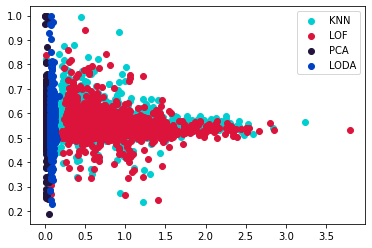

In [223]:
colors1 = '#00CED1' 
colors2 = '#DC143C'
colors = ["#00CED1","#DC143C","#22143C","#0040C2"]
plt.scatter(x=result_knn["time"], y= result_knn["ROC"], c=colors[0])
plt.scatter(x=result_lof["time"], y= result_lof["ROC"], c=colors[1])
plt.scatter(x=result_pca["time"], y= result_pca["ROC"], c=colors[2])
plt.scatter(x=result_loda["time"], y= result_loda["ROC"], c=colors[3])
plt.legend(["KNN","LOF","PCA","LODA"])
plt.show()


可以看出,PCA和LODA整体的训练时间更短，KNN识别离群点的表现相对要好一点。

# Ⅱ. skin数据集


https://github.com/liucc1997/DMC/tree/master/assignment4/assignment4_skin.ipynb

https://github.com/liucc1997/DMC/tree/master/assignment4/assignment4_skin.html